<a href="https://colab.research.google.com/github/Clinda02/realestate_analysis/blob/main/apt_price_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


- 데이터: [KB부동산 데이터 허브](https://data.kbland.kr/) → KB 통계 → 주택가격동향조사
    - [주간 아파트 매매가격지수](https://data.kbland.kr/kbstats/wmh?tIdx=HT01&tsIdx=weekAptSalePriceInx) 전체('24년 10월 7일 기준)
    - [주간 아파트 전세가격지수](https://data.kbland.kr/kbstats/wmh?tIdx=HT01&tsIdx=weekAptRentPriceInx) 전체('24년 10월 7일 기준)

- 가격지수: 기준시점(22년 1월 10일) 대비 조사 시점(24년 10월)의 가격 비율 (주택별·지역별 가중)

# 환경설정

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import os
os.getcwd()

'/content'

# 데이터 불러오기
두 개의 엑셀파일을 읽어와서 각각 `df_sale`, `df_rent` 변수에 할당하고, shape을 확인

In [ ]:
# 코드를 작성하시오
import pandas as pd

df_sale = pd.read_excel('주간 아파트 매매가격지수.xlsx')
df_rent = pd.read_excel('주간 아파트 전세가격지수.xlsx')

In [ ]:
df_sale.shape, df_rent.shape

((278, 832), (278, 832))

 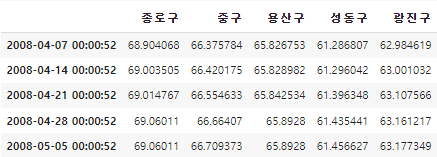

In [ ]:
# 코드를 작성하시오
# 지역명 컬럼을 인덱스로 설정
df_sale= df_sale.set_index('지역명')
df_sale.head()

,2008-04-07 00:00:52,2008-04-14 00:00:52,2008-04-21 00:00:52,2008-04-28 00:00:52,2008-05-05 00:00:52,2008-05-12 00:00:52,2008-05-19 00:00:52,2008-05-26 00:00:52,2008-06-02 00:00:52,2008-06-09 00:00:52,...,2024-07-29 00:00:52,2024-08-05 00:00:52,2024-08-12 00:00:52,2024-08-19 00:00:52,2024-08-26 00:00:52,2024-09-02 00:00:52,2024-09-09 00:00:52,2024-09-23 00:00:52,2024-09-30 00:00:52,2024-10-07 00:00:52
지역명,,,,,,,,,,,,,,,,,,,,,
전국,58.012546,58.088746,58.197535,58.281398,58.355038,58.427476,58.493162,58.553072,58.616457,58.684281,...,89.344631,89.360992,89.405868,89.439824,89.486678,89.530720,89.566492,89.596423,89.615430,89.641072
서울,59.733068,59.88161,60.042211,60.163088,60.278446,60.387011,60.458109,60.525847,60.595353,60.656227,...,91.121229,91.319067,91.555361,91.783405,92.008437,92.208397,92.354427,92.520904,92.603639,92.700462
강북14개구,59.738949,59.980174,60.250467,60.443754,60.625386,60.795838,60.908856,61.036939,61.155861,61.251522,...,88.340533,88.495919,88.664465,88.818466,88.998513,89.147868,89.256582,89.367506,89.416088,89.494905
종로구,68.904068,69.003505,69.014767,69.06011,69.06011,69.019522,69.019522,69.060926,69.101609,69.192539,...,98.687133,98.687133,98.810194,98.870809,99.008700,99.156805,99.250936,99.319963,99.304188,99.310792
중구,66.375784,66.420175,66.554633,66.66407,66.709373,66.709373,66.709373,66.709373,66.709373,66.709373,...,93.948837,94.174342,94.372539,94.747151,94.884112,95.088102,95.561633,95.700824,95.731491,95.852437


In [ ]:
# 인덱스 이름을 초기화
df_sale.index.name = None
df_sale.head()

,2008-04-07 00:00:52,2008-04-14 00:00:52,2008-04-21 00:00:52,2008-04-28 00:00:52,2008-05-05 00:00:52,2008-05-12 00:00:52,2008-05-19 00:00:52,2008-05-26 00:00:52,2008-06-02 00:00:52,2008-06-09 00:00:52,...,2024-07-29 00:00:52,2024-08-05 00:00:52,2024-08-12 00:00:52,2024-08-19 00:00:52,2024-08-26 00:00:52,2024-09-02 00:00:52,2024-09-09 00:00:52,2024-09-23 00:00:52,2024-09-30 00:00:52,2024-10-07 00:00:52
전국,58.012546,58.088746,58.197535,58.281398,58.355038,58.427476,58.493162,58.553072,58.616457,58.684281,...,89.344631,89.360992,89.405868,89.439824,89.486678,89.530720,89.566492,89.596423,89.615430,89.641072
서울,59.733068,59.88161,60.042211,60.163088,60.278446,60.387011,60.458109,60.525847,60.595353,60.656227,...,91.121229,91.319067,91.555361,91.783405,92.008437,92.208397,92.354427,92.520904,92.603639,92.700462
강북14개구,59.738949,59.980174,60.250467,60.443754,60.625386,60.795838,60.908856,61.036939,61.155861,61.251522,...,88.340533,88.495919,88.664465,88.818466,88.998513,89.147868,89.256582,89.367506,89.416088,89.494905
종로구,68.904068,69.003505,69.014767,69.06011,69.06011,69.019522,69.019522,69.060926,69.101609,69.192539,...,98.687133,98.687133,98.810194,98.870809,99.008700,99.156805,99.250936,99.319963,99.304188,99.310792
중구,66.375784,66.420175,66.554633,66.66407,66.709373,66.709373,66.709373,66.709373,66.709373,66.709373,...,93.948837,94.174342,94.372539,94.747151,94.884112,95.088102,95.561633,95.700824,95.731491,95.852437


In [ ]:
#transpose
df_sale = df_sale.T

In [ ]:
df_sale.columns[:30]

Index(['전국', '서울', '강북14개구', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구',
       '성북구', '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '강남11개구', '양천구',
       '강서구', '구로구', '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구',
       '수도권'],
      dtype='object')

In [ ]:
df_sale_seoul = df_sale.iloc[:,3:29].drop('강남11개구',axis=1)
df_sale_seoul.head()

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
2008-04-07 00:00:52,68.904068,66.375784,65.826753,61.286807,62.984619,60.259456,61.849069,57.838799,63.503173,61.965388,...,61.050701,55.791275,60.800721,54.170221,58.258467,62.19232,61.696444,62.208806,61.791658,62.468863
2008-04-14 00:00:52,69.003505,66.420175,65.828982,61.296042,63.001032,60.354779,62.192051,58.045059,63.782711,62.437539,...,61.135689,56.001292,60.87733,54.331671,58.333797,62.241823,61.711878,62.272677,61.800135,62.428665
2008-04-21 00:00:52,69.014767,66.554633,65.842534,61.396348,63.107566,60.541972,62.797377,58.245833,64.016037,62.868569,...,61.280705,56.151303,61.410023,54.446817,58.391922,62.289203,61.702798,62.311381,61.701366,62.420645
2008-04-28 00:00:52,69.06011,66.66407,65.8928,61.435441,63.161217,60.557859,63.236305,58.36017,64.168614,63.144188,...,61.439446,56.215179,61.713353,54.486099,58.420088,62.439184,61.714511,62.373058,61.661603,62.403062
2008-05-05 00:00:52,69.06011,66.709373,65.8928,61.456627,63.177349,60.705621,63.436932,58.543458,64.445705,63.263414,...,61.735933,56.416622,61.860383,54.557468,58.487192,62.609323,61.701722,62.366691,61.509394,62.391405


In [ ]:
df_rent = df_rent.set_index('지역명')
df_rent.index.name = None
df_rent = df_rent.T
df_rent_seoul = df_rent.iloc[:, 3:29].drop('강남11개구', axis=1)

In [ ]:
df_sale_seoul.shape, df_rent_seoul.shape

((831, 25), (831, 25))

## Long Form으로 변경
- `지역명`이 값으로 할당되도록 데이터 구조 변경
- 최종 구조 변경된 컬럼은 `지역명`, `매매가격지수`의 컬럼을 가지고 있음(전세 데이터는 `지역명`, `전세가격지수`의 컬럼을 가지고 있음)
- 변경한 데이터는 각각 `df_sale_seoul_long`, `df_rent_seoul_long` 에 할당
- 변경된 데이터의 shape: (20775, 2)

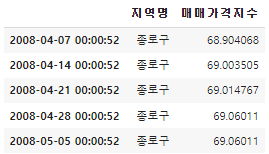

In [ ]:
# unstack
df_sale_seoul.unstack().reset_index(level=0)

,level_0,0
2008-04-07 00:00:52,종로구,68.904068
2008-04-14 00:00:52,종로구,69.003505
2008-04-21 00:00:52,종로구,69.014767
2008-04-28 00:00:52,종로구,69.06011
2008-05-05 00:00:52,종로구,69.06011
...,...,...
2024-09-02 00:00:52,강동구,94.550126
2024-09-09 00:00:52,강동구,94.710078
2024-09-23 00:00:52,강동구,95.158364
2024-09-30 00:00:52,강동구,95.318904


In [ ]:
# 코드를 작성하시오
df_sale_seoul_long = df_sale_seoul.unstack().reset_index(level=0).copy()
df_sale_seoul_long.columns = ['지역명', '매매가격지수']
df_sale_seoul_long.head()

,지역명,매매가격지수
2008-04-07 00:00:52,종로구,68.904068
2008-04-14 00:00:52,종로구,69.003505
2008-04-21 00:00:52,종로구,69.014767
2008-04-28 00:00:52,종로구,69.06011
2008-05-05 00:00:52,종로구,69.06011


In [ ]:
df_rent_seoul_long = df_rent_seoul.unstack().reset_index(level=0).copy()
df_rent_seoul_long.columns = ['지역명', '전세가격지수']
df_rent_seoul_long.head()

,지역명,전세가격지수
2008-04-07 00:00:52,종로구,54.168566
2008-04-14 00:00:52,종로구,54.238522
2008-04-21 00:00:52,종로구,54.238522
2008-04-28 00:00:52,종로구,54.238522
2008-05-05 00:00:52,종로구,54.268338


In [ ]:
df_sale_seoul_long.shape, df_rent_seoul_long.shape

((20775, 2), (20775, 2))

# 데이터 시각화
- 전처리가 수행된 데이터 프레임  `df_sale_seoul`와 `df_rent_seoul` 또는 `df_sale_seoul_long`, `df_rent_seoul_long`을 사용하여 데이터 시각화 수행
- (예시)
    - `강남구`의 날짜별 `매매가격지수`, `전세가격지수` 시각화
    - `강남구`의 `매매가격지수`, `전세가격지수` 상관관계 시각화
    - `매매가격지수`와 `전세가격지수`의 차이가 가장 큰(적은) 지역을 판단하고, 해당 지역에 가격지수를 시각화
    - 연도별 데이터 집계하여 시각화 등
    
- 필요 시 추가 데이터 전처리 수행    

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트(나눔고딕)을 기본 폰트로 사용하도록 설정
plt.rcParams["font.family"] = 'NanumGothic'

# 그래프에서 마이너스 폰트 깨지는 문제 해결
plt.rcParams['axes.unicode_minus'] = False

### 강남구의 날짜별 매매가격지수, 전세가격지수 시각화

In [ ]:
df_sale_seoul.info()

<class 'pandas.core.frame.DataFrame'>
Index: 831 entries, 2008-04-07 00:00:52 to 2024-10-07 00:00:52
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   종로구     831 non-null    object
 1   중구      831 non-null    object
 2   용산구     831 non-null    object
 3   성동구     831 non-null    object
 4   광진구     831 non-null    object
 5   동대문구    831 non-null    object
 6   중랑구     831 non-null    object
 7   성북구     831 non-null    object
 8   강북구     831 non-null    object
 9   도봉구     831 non-null    object
 10  노원구     831 non-null    object
 11  은평구     831 non-null    object
 12  서대문구    831 non-null    object
 13  마포구     831 non-null    object
 14  양천구     831 non-null    object
 15  강서구     831 non-null    object
 16  구로구     831 non-null    object
 17  금천구     831 non-null    object
 18  영등포구    831 non-null    object
 19  동작구     831 non-null    object
 20  관악구     831 non-null    object
 21  서초구     831 non-null    object
 2

In [ ]:
# index 데이터의 자료형을 날짜 형식으로 변경
df_sale_seoul.index = pd.to_datetime(df_sale_seoul.index)
df_rent_seoul.index = pd.to_datetime(df_rent_seoul.index)

In [ ]:
df_sale_seoul.index

DatetimeIndex(['2008-04-07 00:00:52', '2008-04-14 00:00:52',
               '2008-04-21 00:00:52', '2008-04-28 00:00:52',
               '2008-05-05 00:00:52', '2008-05-12 00:00:52',
               '2008-05-19 00:00:52', '2008-05-26 00:00:52',
               '2008-06-02 00:00:52', '2008-06-09 00:00:52',
               ...
               '2024-07-29 00:00:52', '2024-08-05 00:00:52',
               '2024-08-12 00:00:52', '2024-08-19 00:00:52',
               '2024-08-26 00:00:52', '2024-09-02 00:00:52',
               '2024-09-09 00:00:52', '2024-09-23 00:00:52',
               '2024-09-30 00:00:52', '2024-10-07 00:00:52'],
              dtype='datetime64[ns]', length=831, freq=None)

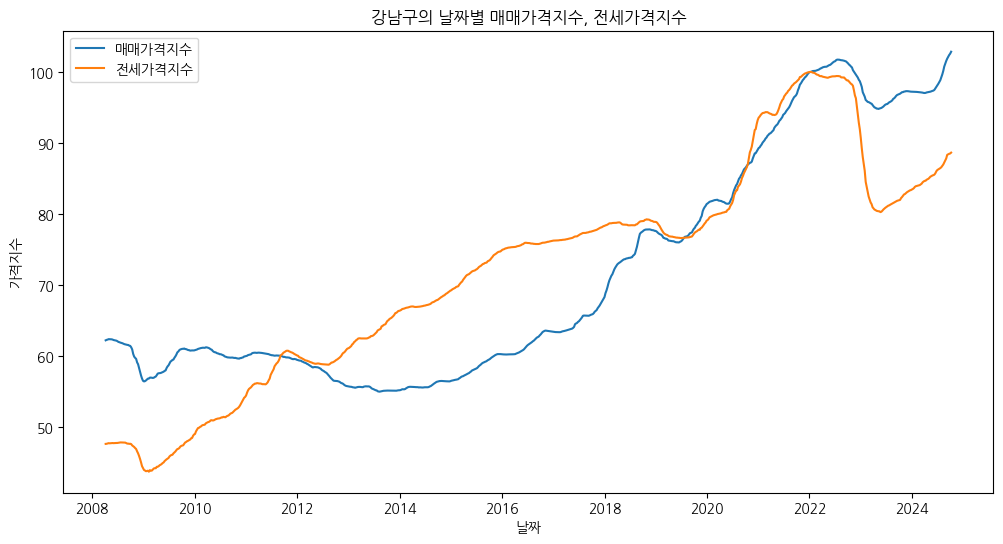

In [ ]:
# 코드를 작성하시오
# df_sale_seoul['강남구'].plot()

# figuresize 설정
plt.figure(figsize=(12, 6))

# lineplot
plt.plot(df_sale_seoul['강남구'], label='매매가격지수')
plt.plot(df_rent_seoul['강남구'], label='전세가격지수')
plt.title('강남구의 날짜별 매매가격지수, 전세가격지수')
plt.xlabel('날짜')
plt.ylabel('가격지수')
plt.legend()
plt.show()

In [ ]:
df_sale_seoul.head()

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
2008-04-07 00:00:52,68.904068,66.375784,65.826753,61.286807,62.984619,60.259456,61.849069,57.838799,63.503173,61.965388,...,61.050701,55.791275,60.800721,54.170221,58.258467,62.19232,61.696444,62.208806,61.791658,62.468863
2008-04-14 00:00:52,69.003505,66.420175,65.828982,61.296042,63.001032,60.354779,62.192051,58.045059,63.782711,62.437539,...,61.135689,56.001292,60.87733,54.331671,58.333797,62.241823,61.711878,62.272677,61.800135,62.428665
2008-04-21 00:00:52,69.014767,66.554633,65.842534,61.396348,63.107566,60.541972,62.797377,58.245833,64.016037,62.868569,...,61.280705,56.151303,61.410023,54.446817,58.391922,62.289203,61.702798,62.311381,61.701366,62.420645
2008-04-28 00:00:52,69.06011,66.66407,65.8928,61.435441,63.161217,60.557859,63.236305,58.36017,64.168614,63.144188,...,61.439446,56.215179,61.713353,54.486099,58.420088,62.439184,61.714511,62.373058,61.661603,62.403062
2008-05-05 00:00:52,69.06011,66.709373,65.8928,61.456627,63.177349,60.705621,63.436932,58.543458,64.445705,63.263414,...,61.735933,56.416622,61.860383,54.557468,58.487192,62.609323,61.701722,62.366691,61.509394,62.391405


In [ ]:
# 용산구 데이터프레임 분리하기
yongsan = df_sale_seoul.iloc[:,2]
# yongsan = yongsan.rename(columns={'용산구' : '용산구_매매'}, inplace= True)
yongsan

,용산구
2008-04-07 00:00:52,65.826753
2008-04-14 00:00:52,65.828982
2008-04-21 00:00:52,65.842534
2008-04-28 00:00:52,65.8928
2008-05-05 00:00:52,65.8928
...,...
2024-09-02 00:00:52,102.065775
2024-09-09 00:00:52,102.120412
2024-09-23 00:00:52,102.342085
2024-09-30 00:00:52,102.378964


ConversionError: Failed to convert value(s) to axis units: array([datetime.datetime(2008, 4, 7, 0, 0, 52),
       datetime.datetime(2008, 4, 14, 0, 0, 52),
       datetime.datetime(2008, 4, 21, 0, 0, 52),
       datetime.datetime(2008, 4, 28, 0, 0, 52),
       datetime.datetime(2008, 5, 5, 0, 0, 52),
       datetime.datetime(2008, 5, 12, 0, 0, 52),
       datetime.datetime(2008, 5, 19, 0, 0, 52),
       datetime.datetime(2008, 5, 26, 0, 0, 52),
       datetime.datetime(2008, 6, 2, 0, 0, 52),
       datetime.datetime(2008, 6, 9, 0, 0, 52),
       datetime.datetime(2008, 6, 16, 0, 0, 52),
       datetime.datetime(2008, 6, 23, 0, 0, 52),
       datetime.datetime(2008, 6, 30, 0, 0, 52),
       datetime.datetime(2008, 7, 7, 0, 0, 52),
       datetime.datetime(2008, 7, 14, 0, 0, 52),
       datetime.datetime(2008, 7, 21, 0, 0, 52),
       datetime.datetime(2008, 7, 28, 0, 0, 52),
       datetime.datetime(2008, 8, 4, 0, 0, 52),
       datetime.datetime(2008, 8, 11, 0, 0, 52),
       datetime.datetime(2008, 8, 18, 0, 0, 52),
       datetime.datetime(2008, 8, 25, 0, 0, 52),
       datetime.datetime(2008, 9, 1, 0, 0, 52),
       datetime.datetime(2008, 9, 8, 0, 0, 52),
       datetime.datetime(2008, 9, 15, 0, 0, 52),
       datetime.datetime(2008, 9, 22, 0, 0, 52),
       datetime.datetime(2008, 9, 29, 0, 0, 52),
       datetime.datetime(2008, 10, 6, 0, 0, 52),
       datetime.datetime(2008, 10, 13, 0, 0, 52),
       datetime.datetime(2008, 10, 20, 0, 0, 52),
       datetime.datetime(2008, 10, 27, 0, 0, 52),
       datetime.datetime(2008, 11, 3, 0, 0, 52),
       datetime.datetime(2008, 11, 10, 0, 0, 52),
       datetime.datetime(2008, 11, 17, 0, 0, 52),
       datetime.datetime(2008, 11, 24, 0, 0, 52),
       datetime.datetime(2008, 12, 1, 0, 0, 52),
       datetime.datetime(2008, 12, 8, 0, 0, 52),
       datetime.datetime(2008, 12, 15, 0, 0, 52),
       datetime.datetime(2008, 12, 22, 0, 0, 52),
       datetime.datetime(2008, 12, 29, 0, 0, 52),
       datetime.datetime(2009, 1, 5, 0, 0, 52),
       datetime.datetime(2009, 1, 12, 0, 0, 52),
       datetime.datetime(2009, 1, 19, 0, 0, 52),
       datetime.datetime(2009, 2, 2, 0, 0, 52),
       datetime.datetime(2009, 2, 9, 0, 0, 52),
       datetime.datetime(2009, 2, 16, 0, 0, 52),
       datetime.datetime(2009, 2, 23, 0, 0, 52),
       datetime.datetime(2009, 3, 2, 0, 0, 52),
       datetime.datetime(2009, 3, 9, 0, 0, 52),
       datetime.datetime(2009, 3, 16, 0, 0, 52),
       datetime.datetime(2009, 3, 23, 0, 0, 52),
       datetime.datetime(2009, 3, 30, 0, 0, 52),
       datetime.datetime(2009, 4, 6, 0, 0, 52),
       datetime.datetime(2009, 4, 13, 0, 0, 52),
       datetime.datetime(2009, 4, 20, 0, 0, 52),
       datetime.datetime(2009, 4, 27, 0, 0, 52),
       datetime.datetime(2009, 5, 4, 0, 0, 52),
       datetime.datetime(2009, 5, 11, 0, 0, 52),
       datetime.datetime(2009, 5, 18, 0, 0, 52),
       datetime.datetime(2009, 5, 25, 0, 0, 52),
       datetime.datetime(2009, 6, 1, 0, 0, 52),
       datetime.datetime(2009, 6, 8, 0, 0, 52),
       datetime.datetime(2009, 6, 15, 0, 0, 52),
       datetime.datetime(2009, 6, 22, 0, 0, 52),
       datetime.datetime(2009, 6, 29, 0, 0, 52),
       datetime.datetime(2009, 7, 6, 0, 0, 52),
       datetime.datetime(2009, 7, 13, 0, 0, 52),
       datetime.datetime(2009, 7, 20, 0, 0, 52),
       datetime.datetime(2009, 7, 27, 0, 0, 52),
       datetime.datetime(2009, 8, 3, 0, 0, 52),
       datetime.datetime(2009, 8, 10, 0, 0, 52),
       datetime.datetime(2009, 8, 17, 0, 0, 52),
       datetime.datetime(2009, 8, 24, 0, 0, 52),
       datetime.datetime(2009, 8, 31, 0, 0, 52),
       datetime.datetime(2009, 9, 7, 0, 0, 52),
       datetime.datetime(2009, 9, 14, 0, 0, 52),
       datetime.datetime(2009, 9, 21, 0, 0, 52),
       datetime.datetime(2009, 9, 28, 0, 0, 52),
       datetime.datetime(2009, 10, 5, 0, 0, 52),
       datetime.datetime(2009, 10, 12, 0, 0, 52),
       datetime.datetime(2009, 10, 19, 0, 0, 52),
       datetime.datetime(2009, 10, 26, 0, 0, 52),
       datetime.datetime(2009, 11, 2, 0, 0, 52),
       datetime.datetime(2009, 11, 9, 0, 0, 52),
       datetime.datetime(2009, 11, 16, 0, 0, 52),
       datetime.datetime(2009, 11, 23, 0, 0, 52),
       datetime.datetime(2009, 11, 30, 0, 0, 52),
       datetime.datetime(2009, 12, 7, 0, 0, 52),
       datetime.datetime(2009, 12, 14, 0, 0, 52),
       datetime.datetime(2009, 12, 21, 0, 0, 52),
       datetime.datetime(2009, 12, 28, 0, 0, 52),
       datetime.datetime(2010, 1, 4, 0, 0, 52),
       datetime.datetime(2010, 1, 11, 0, 0, 52),
       datetime.datetime(2010, 1, 18, 0, 0, 52),
       datetime.datetime(2010, 1, 25, 0, 0, 52),
       datetime.datetime(2010, 2, 1, 0, 0, 52),
       datetime.datetime(2010, 2, 8, 0, 0, 52),
       datetime.datetime(2010, 2, 15, 0, 0, 52),
       datetime.datetime(2010, 2, 22, 0, 0, 52),
       datetime.datetime(2010, 3, 1, 0, 0, 52),
       datetime.datetime(2010, 3, 8, 0, 0, 52),
       datetime.datetime(2010, 3, 15, 0, 0, 52),
       datetime.datetime(2010, 3, 22, 0, 0, 52),
       datetime.datetime(2010, 3, 29, 0, 0, 52),
       datetime.datetime(2010, 4, 5, 0, 0, 52),
       datetime.datetime(2010, 4, 12, 0, 0, 52),
       datetime.datetime(2010, 4, 19, 0, 0, 52),
       datetime.datetime(2010, 4, 26, 0, 0, 52),
       datetime.datetime(2010, 5, 3, 0, 0, 52),
       datetime.datetime(2010, 5, 10, 0, 0, 52),
       datetime.datetime(2010, 5, 17, 0, 0, 52),
       datetime.datetime(2010, 5, 24, 0, 0, 52),
       datetime.datetime(2010, 5, 31, 0, 0, 52),
       datetime.datetime(2010, 6, 7, 0, 0, 52),
       datetime.datetime(2010, 6, 14, 0, 0, 52),
       datetime.datetime(2010, 6, 21, 0, 0, 52),
       datetime.datetime(2010, 6, 28, 0, 0, 52),
       datetime.datetime(2010, 7, 5, 0, 0, 52),
       datetime.datetime(2010, 7, 12, 0, 0, 52),
       datetime.datetime(2010, 7, 19, 0, 0, 52),
       datetime.datetime(2010, 7, 26, 0, 0, 52),
       datetime.datetime(2010, 8, 2, 0, 0, 52),
       datetime.datetime(2010, 8, 9, 0, 0, 52),
       datetime.datetime(2010, 8, 16, 0, 0, 52),
       datetime.datetime(2010, 8, 23, 0, 0, 52),
       datetime.datetime(2010, 8, 30, 0, 0, 52),
       datetime.datetime(2010, 9, 6, 0, 0, 52),
       datetime.datetime(2010, 9, 13, 0, 0, 52),
       datetime.datetime(2010, 9, 27, 0, 0, 52),
       datetime.datetime(2010, 10, 4, 0, 0, 52),
       datetime.datetime(2010, 10, 11, 0, 0, 52),
       datetime.datetime(2010, 10, 18, 0, 0, 52),
       datetime.datetime(2010, 10, 25, 0, 0, 52),
       datetime.datetime(2010, 11, 1, 0, 0, 52),
       datetime.datetime(2010, 11, 8, 0, 0, 52),
       datetime.datetime(2010, 11, 15, 0, 0, 52),
       datetime.datetime(2010, 11, 22, 0, 0, 52),
       datetime.datetime(2010, 11, 29, 0, 0, 52),
       datetime.datetime(2010, 12, 6, 0, 0, 52),
       datetime.datetime(2010, 12, 13, 0, 0, 52),
       datetime.datetime(2010, 12, 20, 0, 0, 52),
       datetime.datetime(2010, 12, 27, 0, 0, 52),
       datetime.datetime(2011, 1, 3, 0, 0, 52),
       datetime.datetime(2011, 1, 10, 0, 0, 52),
       datetime.datetime(2011, 1, 17, 0, 0, 52),
       datetime.datetime(2011, 1, 24, 0, 0, 52),
       datetime.datetime(2011, 2, 7, 0, 0, 52),
       datetime.datetime(2011, 2, 14, 0, 0, 52),
       datetime.datetime(2011, 2, 21, 0, 0, 52),
       datetime.datetime(2011, 2, 28, 0, 0, 52),
       datetime.datetime(2011, 3, 7, 0, 0, 52),
       datetime.datetime(2011, 3, 14, 0, 0, 52),
       datetime.datetime(2011, 3, 21, 0, 0, 52),
       datetime.datetime(2011, 3, 28, 0, 0, 52),
       datetime.datetime(2011, 4, 4, 0, 0, 52),
       datetime.datetime(2011, 4, 11, 0, 0, 52),
       datetime.datetime(2011, 4, 18, 0, 0, 52),
       datetime.datetime(2011, 4, 25, 0, 0, 52),
       datetime.datetime(2011, 5, 2, 0, 0, 52),
       datetime.datetime(2011, 5, 9, 0, 0, 52),
       datetime.datetime(2011, 5, 16, 0, 0, 52),
       datetime.datetime(2011, 5, 23, 0, 0, 52),
       datetime.datetime(2011, 5, 30, 0, 0, 52),
       datetime.datetime(2011, 6, 6, 0, 0, 52),
       datetime.datetime(2011, 6, 13, 0, 0, 52),
       datetime.datetime(2011, 6, 20, 0, 0, 52),
       datetime.datetime(2011, 6, 27, 0, 0, 52),
       datetime.datetime(2011, 7, 4, 0, 0, 52),
       datetime.datetime(2011, 7, 11, 0, 0, 52),
       datetime.datetime(2011, 7, 18, 0, 0, 52),
       datetime.datetime(2011, 7, 25, 0, 0, 52),
       datetime.datetime(2011, 8, 1, 0, 0, 52),
       datetime.datetime(2011, 8, 8, 0, 0, 52),
       datetime.datetime(2011, 8, 15, 0, 0, 52),
       datetime.datetime(2011, 8, 22, 0, 0, 52),
       datetime.datetime(2011, 8, 29, 0, 0, 52),
       datetime.datetime(2011, 9, 5, 0, 0, 52),
       datetime.datetime(2011, 9, 19, 0, 0, 52),
       datetime.datetime(2011, 9, 26, 0, 0, 52),
       datetime.datetime(2011, 10, 3, 0, 0, 52),
       datetime.datetime(2011, 10, 10, 0, 0, 52),
       datetime.datetime(2011, 10, 17, 0, 0, 52),
       datetime.datetime(2011, 10, 24, 0, 0, 52),
       datetime.datetime(2011, 10, 31, 0, 0, 52),
       datetime.datetime(2011, 11, 7, 0, 0, 52),
       datetime.datetime(2011, 11, 14, 0, 0, 52),
       datetime.datetime(2011, 11, 21, 0, 0, 52),
       datetime.datetime(2011, 11, 28, 0, 0, 52),
       datetime.datetime(2011, 12, 5, 0, 0, 52),
       datetime.datetime(2011, 12, 12, 0, 0, 52),
       datetime.datetime(2011, 12, 19, 0, 0, 52),
       datetime.datetime(2011, 12, 26, 0, 0, 52),
       datetime.datetime(2012, 1, 2, 0, 0, 52),
       datetime.datetime(2012, 1, 9, 0, 0, 52),
       datetime.datetime(2012, 1, 16, 0, 0, 52),
       datetime.datetime(2012, 1, 30, 0, 0, 52),
       datetime.datetime(2012, 2, 6, 0, 0, 52),
       datetime.datetime(2012, 2, 13, 0, 0, 52),
       datetime.datetime(2012, 2, 20, 0, 0, 52),
       datetime.datetime(2012, 2, 27, 0, 0, 52),
       datetime.datetime(2012, 3, 5, 0, 0, 52),
       datetime.datetime(2012, 3, 12, 0, 0, 52),
       datetime.datetime(2012, 3, 19, 0, 0, 52),
       datetime.datetime(2012, 3, 26, 0, 0, 52),
       datetime.datetime(2012, 4, 2, 0, 0, 52),
       datetime.datetime(2012, 4, 9, 0, 0, 52),
       datetime.datetime(2012, 4, 16, 0, 0, 52),
       datetime.datetime(2012, 4, 23, 0, 0, 52),
       datetime.datetime(2012, 4, 30, 0, 0, 52),
       datetime.datetime(2012, 5, 7, 0, 0, 52),
       datetime.datetime(2012, 5, 14, 0, 0, 52),
       datetime.datetime(2012, 5, 21, 0, 0, 52),
       datetime.datetime(2012, 5, 28, 0, 0, 52),
       datetime.datetime(2012, 6, 4, 0, 0, 52),
       datetime.datetime(2012, 6, 11, 0, 0, 52),
       datetime.datetime(2012, 6, 18, 0, 0, 52),
       datetime.datetime(2012, 6, 25, 0, 0, 52),
       datetime.datetime(2012, 7, 2, 0, 0, 52),
       datetime.datetime(2012, 7, 9, 0, 0, 52),
       datetime.datetime(2012, 7, 16, 0, 0, 52),
       datetime.datetime(2012, 7, 23, 0, 0, 52),
       datetime.datetime(2012, 7, 30, 0, 0, 52),
       datetime.datetime(2012, 8, 6, 0, 0, 52),
       datetime.datetime(2012, 8, 13, 0, 0, 52),
       datetime.datetime(2012, 8, 20, 0, 0, 52),
       datetime.datetime(2012, 8, 27, 0, 0, 52),
       datetime.datetime(2012, 9, 3, 0, 0, 52),
       datetime.datetime(2012, 9, 10, 0, 0, 52),
       datetime.datetime(2012, 9, 17, 0, 0, 52),
       datetime.datetime(2012, 9, 24, 0, 0, 52),
       datetime.datetime(2012, 10, 8, 0, 0, 52),
       datetime.datetime(2012, 10, 15, 0, 0, 52),
       datetime.datetime(2012, 10, 22, 0, 0, 52),
       datetime.datetime(2012, 10, 29, 0, 0, 52),
       datetime.datetime(2012, 11, 5, 0, 0, 52),
       datetime.datetime(2012, 11, 12, 0, 0, 52),
       datetime.datetime(2012, 11, 19, 0, 0, 52),
       datetime.datetime(2012, 11, 26, 0, 0, 52),
       datetime.datetime(2012, 12, 3, 0, 0, 52),
       datetime.datetime(2012, 12, 10, 0, 0, 52),
       datetime.datetime(2012, 12, 17, 0, 0, 52),
       datetime.datetime(2012, 12, 24, 0, 0, 52),
       datetime.datetime(2012, 12, 31, 0, 0, 52),
       datetime.datetime(2013, 1, 7, 0, 0, 52),
       datetime.datetime(2013, 1, 14, 0, 0, 52),
       datetime.datetime(2013, 1, 21, 0, 0, 52),
       datetime.datetime(2013, 1, 28, 0, 0, 52),
       datetime.datetime(2013, 2, 4, 0, 0, 52),
       datetime.datetime(2013, 2, 11, 0, 0, 52),
       datetime.datetime(2013, 2, 18, 0, 0, 52),
       datetime.datetime(2013, 2, 25, 0, 0, 52),
       datetime.datetime(2013, 3, 4, 0, 0, 52),
       datetime.datetime(2013, 3, 11, 0, 0, 52),
       datetime.datetime(2013, 3, 18, 0, 0, 52),
       datetime.datetime(2013, 3, 25, 0, 0, 52),
       datetime.datetime(2013, 4, 1, 0, 0, 52),
       datetime.datetime(2013, 4, 8, 0, 0, 52),
       datetime.datetime(2013, 4, 15, 0, 0, 52),
       datetime.datetime(2013, 4, 22, 0, 0, 52),
       datetime.datetime(2013, 4, 29, 0, 0, 52),
       datetime.datetime(2013, 5, 6, 0, 0, 52),
       datetime.datetime(2013, 5, 13, 0, 0, 52),
       datetime.datetime(2013, 5, 20, 0, 0, 52),
       datetime.datetime(2013, 5, 27, 0, 0, 52),
       datetime.datetime(2013, 6, 3, 0, 0, 52),
       datetime.datetime(2013, 6, 10, 0, 0, 52),
       datetime.datetime(2013, 6, 17, 0, 0, 52),
       datetime.datetime(2013, 6, 24, 0, 0, 52),
       datetime.datetime(2013, 7, 1, 0, 0, 52),
       datetime.datetime(2013, 7, 8, 0, 0, 52),
       datetime.datetime(2013, 7, 15, 0, 0, 52),
       datetime.datetime(2013, 7, 22, 0, 0, 52),
       datetime.datetime(2013, 7, 29, 0, 0, 52),
       datetime.datetime(2013, 8, 5, 0, 0, 52),
       datetime.datetime(2013, 8, 12, 0, 0, 52),
       datetime.datetime(2013, 8, 19, 0, 0, 52),
       datetime.datetime(2013, 8, 26, 0, 0, 52),
       datetime.datetime(2013, 9, 2, 0, 0, 52),
       datetime.datetime(2013, 9, 9, 0, 0, 52),
       datetime.datetime(2013, 9, 23, 0, 0, 52),
       datetime.datetime(2013, 9, 30, 0, 0, 52),
       datetime.datetime(2013, 10, 7, 0, 0, 52),
       datetime.datetime(2013, 10, 14, 0, 0, 52),
       datetime.datetime(2013, 10, 21, 0, 0, 52),
       datetime.datetime(2013, 10, 28, 0, 0, 52),
       datetime.datetime(2013, 11, 4, 0, 0, 52),
       datetime.datetime(2013, 11, 11, 0, 0, 52),
       datetime.datetime(2013, 11, 18, 0, 0, 52),
       datetime.datetime(2013, 11, 25, 0, 0, 52),
       datetime.datetime(2013, 12, 2, 0, 0, 52),
       datetime.datetime(2013, 12, 9, 0, 0, 52),
       datetime.datetime(2013, 12, 16, 0, 0, 52),
       datetime.datetime(2013, 12, 23, 0, 0, 52),
       datetime.datetime(2013, 12, 30, 0, 0, 52),
       datetime.datetime(2014, 1, 6, 0, 0, 52),
       datetime.datetime(2014, 1, 13, 0, 0, 52),
       datetime.datetime(2014, 1, 20, 0, 0, 52),
       datetime.datetime(2014, 2, 3, 0, 0, 52),
       datetime.datetime(2014, 2, 10, 0, 0, 52),
       datetime.datetime(2014, 2, 17, 0, 0, 52),
       datetime.datetime(2014, 2, 24, 0, 0, 52),
       datetime.datetime(2014, 3, 3, 0, 0, 52),
       datetime.datetime(2014, 3, 10, 0, 0, 52),
       datetime.datetime(2014, 3, 17, 0, 0, 52),
       datetime.datetime(2014, 3, 24, 0, 0, 52),
       datetime.datetime(2014, 3, 31, 0, 0, 52),
       datetime.datetime(2014, 4, 7, 0, 0, 52),
       datetime.datetime(2014, 4, 14, 0, 0, 52),
       datetime.datetime(2014, 4, 21, 0, 0, 52),
       datetime.datetime(2014, 4, 28, 0, 0, 52),
       datetime.datetime(2014, 5, 12, 0, 0, 52),
       datetime.datetime(2014, 5, 19, 0, 0, 52),
       datetime.datetime(2014, 5, 26, 0, 0, 52),
       datetime.datetime(2014, 6, 2, 0, 0, 52),
       datetime.datetime(2014, 6, 9, 0, 0, 52),
       datetime.datetime(2014, 6, 16, 0, 0, 52),
       datetime.datetime(2014, 6, 23, 0, 0, 52),
       datetime.datetime(2014, 6, 30, 0, 0, 52),
       datetime.datetime(2014, 7, 7, 0, 0, 52),
       datetime.datetime(2014, 7, 14, 0, 0, 52),
       datetime.datetime(2014, 7, 21, 0, 0, 52),
       datetime.datetime(2014, 7, 28, 0, 0, 52),
       datetime.datetime(2014, 8, 4, 0, 0, 52),
       datetime.datetime(2014, 8, 11, 0, 0, 52),
       datetime.datetime(2014, 8, 18, 0, 0, 52),
       datetime.datetime(2014, 8, 25, 0, 0, 52),
       datetime.datetime(2014, 9, 1, 0, 0, 52),
       datetime.datetime(2014, 9, 15, 0, 0, 52),
       datetime.datetime(2014, 9, 22, 0, 0, 52),
       datetime.datetime(2014, 9, 29, 0, 0, 52),
       datetime.datetime(2014, 10, 6, 0, 0, 52),
       datetime.datetime(2014, 10, 13, 0, 0, 52),
       datetime.datetime(2014, 10, 20, 0, 0, 52),
       datetime.datetime(2014, 10, 27, 0, 0, 52),
       datetime.datetime(2014, 11, 3, 0, 0, 52),
       datetime.datetime(2014, 11, 10, 0, 0, 52),
       datetime.datetime(2014, 11, 17, 0, 0, 52),
       datetime.datetime(2014, 11, 24, 0, 0, 52),
       datetime.datetime(2014, 12, 1, 0, 0, 52),
       datetime.datetime(2014, 12, 8, 0, 0, 52),
       datetime.datetime(2014, 12, 15, 0, 0, 52),
       datetime.datetime(2014, 12, 22, 0, 0, 52),
       datetime.datetime(2014, 12, 29, 0, 0, 52),
       datetime.datetime(2015, 1, 5, 0, 0, 52),
       datetime.datetime(2015, 1, 12, 0, 0, 52),
       datetime.datetime(2015, 1, 19, 0, 0, 52),
       datetime.datetime(2015, 1, 26, 0, 0, 52),
       datetime.datetime(2015, 2, 2, 0, 0, 52),
       datetime.datetime(2015, 2, 9, 0, 0, 52),
       datetime.datetime(2015, 2, 23, 0, 0, 52),
       datetime.datetime(2015, 3, 2, 0, 0, 52),
       datetime.datetime(2015, 3, 9, 0, 0, 52),
       datetime.datetime(2015, 3, 16, 0, 0, 52),
       datetime.datetime(2015, 3, 23, 0, 0, 52),
       datetime.datetime(2015, 3, 30, 0, 0, 52),
       datetime.datetime(2015, 4, 6, 0, 0, 52),
       datetime.datetime(2015, 4, 13, 0, 0, 52),
       datetime.datetime(2015, 4, 20, 0, 0, 52),
       datetime.datetime(2015, 4, 27, 0, 0, 52),
       datetime.datetime(2015, 5, 4, 0, 0, 52),
       datetime.datetime(2015, 5, 11, 0, 0, 52),
       datetime.datetime(2015, 5, 18, 0, 0, 52),
       datetime.datetime(2015, 5, 25, 0, 0, 52),
       datetime.datetime(2015, 6, 1, 0, 0, 52),
       datetime.datetime(2015, 6, 8, 0, 0, 52),
       datetime.datetime(2015, 6, 15, 0, 0, 52),
       datetime.datetime(2015, 6, 22, 0, 0, 52),
       datetime.datetime(2015, 6, 29, 0, 0, 52),
       datetime.datetime(2015, 7, 6, 0, 0, 52),
       datetime.datetime(2015, 7, 13, 0, 0, 52),
       datetime.datetime(2015, 7, 20, 0, 0, 52),
       datetime.datetime(2015, 7, 27, 0, 0, 52),
       datetime.datetime(2015, 8, 3, 0, 0, 52),
       datetime.datetime(2015, 8, 10, 0, 0, 52),
       datetime.datetime(2015, 8, 17, 0, 0, 52),
       datetime.datetime(2015, 8, 24, 0, 0, 52),
       datetime.datetime(2015, 8, 31, 0, 0, 52),
       datetime.datetime(2015, 9, 7, 0, 0, 52),
       datetime.datetime(2015, 9, 14, 0, 0, 52),
       datetime.datetime(2015, 9, 21, 0, 0, 52),
       datetime.datetime(2015, 10, 5, 0, 0, 52),
       datetime.datetime(2015, 10, 12, 0, 0, 52),
       datetime.datetime(2015, 10, 19, 0, 0, 52),
       datetime.datetime(2015, 10, 26, 0, 0, 52),
       datetime.datetime(2015, 11, 2, 0, 0, 52),
       datetime.datetime(2015, 11, 9, 0, 0, 52),
       datetime.datetime(2015, 11, 16, 0, 0, 52),
       datetime.datetime(2015, 11, 23, 0, 0, 52),
       datetime.datetime(2015, 11, 30, 0, 0, 52),
       datetime.datetime(2015, 12, 7, 0, 0, 52),
       datetime.datetime(2015, 12, 14, 0, 0, 52),
       datetime.datetime(2015, 12, 21, 0, 0, 52),
       datetime.datetime(2015, 12, 28, 0, 0, 52),
       datetime.datetime(2016, 1, 4, 0, 0, 52),
       datetime.datetime(2016, 1, 11, 0, 0, 52),
       datetime.datetime(2016, 1, 18, 0, 0, 52),
       datetime.datetime(2016, 1, 25, 0, 0, 52),
       datetime.datetime(2016, 2, 1, 0, 0, 52),
       datetime.datetime(2016, 2, 15, 0, 0, 52),
       datetime.datetime(2016, 2, 22, 0, 0, 52),
       datetime.datetime(2016, 2, 29, 0, 0, 52),
       datetime.datetime(2016, 3, 7, 0, 0, 52),
       datetime.datetime(2016, 3, 14, 0, 0, 52),
       datetime.datetime(2016, 3, 21, 0, 0, 52),
       datetime.datetime(2016, 3, 28, 0, 0, 52),
       datetime.datetime(2016, 4, 4, 0, 0, 52),
       datetime.datetime(2016, 4, 11, 0, 0, 52),
       datetime.datetime(2016, 4, 18, 0, 0, 52),
       datetime.datetime(2016, 4, 25, 0, 0, 52),
       datetime.datetime(2016, 5, 2, 0, 0, 52),
       datetime.datetime(2016, 5, 9, 0, 0, 52),
       datetime.datetime(2016, 5, 16, 0, 0, 52),
       datetime.datetime(2016, 5, 23, 0, 0, 52),
       datetime.datetime(2016, 5, 30, 0, 0, 52),
       datetime.datetime(2016, 6, 6, 0, 0, 52),
       datetime.datetime(2016, 6, 13, 0, 0, 52),
       datetime.datetime(2016, 6, 20, 0, 0, 52),
       datetime.datetime(2016, 6, 27, 0, 0, 52),
       datetime.datetime(2016, 7, 4, 0, 0, 52),
       datetime.datetime(2016, 7, 11, 0, 0, 52),
       datetime.datetime(2016, 7, 18, 0, 0, 52),
       datetime.datetime(2016, 7, 25, 0, 0, 52),
       datetime.datetime(2016, 8, 1, 0, 0, 52),
       datetime.datetime(2016, 8, 8, 0, 0, 52),
       datetime.datetime(2016, 8, 15, 0, 0, 52),
       datetime.datetime(2016, 8, 22, 0, 0, 52),
       datetime.datetime(2016, 8, 29, 0, 0, 52),
       datetime.datetime(2016, 9, 5, 0, 0, 52),
       datetime.datetime(2016, 9, 19, 0, 0, 52),
       datetime.datetime(2016, 9, 26, 0, 0, 52),
       datetime.datetime(2016, 10, 3, 0, 0, 52),
       datetime.datetime(2016, 10, 10, 0, 0, 52),
       datetime.datetime(2016, 10, 17, 0, 0, 52),
       datetime.datetime(2016, 10, 24, 0, 0, 52),
       datetime.datetime(2016, 10, 31, 0, 0, 52),
       datetime.datetime(2016, 11, 7, 0, 0, 52),
       datetime.datetime(2016, 11, 14, 0, 0, 52),
       datetime.datetime(2016, 11, 21, 0, 0, 52),
       datetime.datetime(2016, 11, 28, 0, 0, 52),
       datetime.datetime(2016, 12, 5, 0, 0, 52),
       datetime.datetime(2016, 12, 12, 0, 0, 52),
       datetime.datetime(2016, 12, 19, 0, 0, 52),
       datetime.datetime(2016, 12, 26, 0, 0, 52),
       datetime.datetime(2017, 1, 2, 0, 0, 52),
       datetime.datetime(2017, 1, 9, 0, 0, 52),
       datetime.datetime(2017, 1, 16, 0, 0, 52),
       datetime.datetime(2017, 1, 23, 0, 0, 52),
       datetime.datetime(2017, 1, 30, 0, 0, 52),
       datetime.datetime(2017, 2, 6, 0, 0, 52),
       datetime.datetime(2017, 2, 13, 0, 0, 52),
       datetime.datetime(2017, 2, 20, 0, 0, 52),
       datetime.datetime(2017, 2, 27, 0, 0, 52),
       datetime.datetime(2017, 3, 6, 0, 0, 52),
       datetime.datetime(2017, 3, 13, 0, 0, 52),
       datetime.datetime(2017, 3, 20, 0, 0, 52),
       datetime.datetime(2017, 3, 27, 0, 0, 52),
       datetime.datetime(2017, 4, 3, 0, 0, 52),
       datetime.datetime(2017, 4, 10, 0, 0, 52),
       datetime.datetime(2017, 4, 17, 0, 0, 52),
       datetime.datetime(2017, 4, 24, 0, 0, 52),
       datetime.datetime(2017, 5, 8, 0, 0, 52),
       datetime.datetime(2017, 5, 15, 0, 0, 52),
       datetime.datetime(2017, 5, 22, 0, 0, 52),
       datetime.datetime(2017, 5, 29, 0, 0, 52),
       datetime.datetime(2017, 6, 5, 0, 0, 52),
       datetime.datetime(2017, 6, 12, 0, 0, 52),
       datetime.datetime(2017, 6, 19, 0, 0, 52),
       datetime.datetime(2017, 6, 26, 0, 0, 52),
       datetime.datetime(2017, 7, 3, 0, 0, 52),
       datetime.datetime(2017, 7, 10, 0, 0, 52),
       datetime.datetime(2017, 7, 17, 0, 0, 52),
       datetime.datetime(2017, 7, 24, 0, 0, 52),
       datetime.datetime(2017, 7, 31, 0, 0, 52),
       datetime.datetime(2017, 8, 7, 0, 0, 52),
       datetime.datetime(2017, 8, 14, 0, 0, 52),
       datetime.datetime(2017, 8, 21, 0, 0, 52),
       datetime.datetime(2017, 8, 28, 0, 0, 52),
       datetime.datetime(2017, 9, 4, 0, 0, 52),
       datetime.datetime(2017, 9, 11, 0, 0, 52),
       datetime.datetime(2017, 9, 18, 0, 0, 52),
       datetime.datetime(2017, 9, 25, 0, 0, 52),
       datetime.datetime(2017, 10, 9, 0, 0, 52),
       datetime.datetime(2017, 10, 16, 0, 0, 52),
       datetime.datetime(2017, 10, 23, 0, 0, 52),
       datetime.datetime(2017, 10, 30, 0, 0, 52),
       datetime.datetime(2017, 11, 6, 0, 0, 52),
       datetime.datetime(2017, 11, 13, 0, 0, 52),
       datetime.datetime(2017, 11, 20, 0, 0, 52),
       datetime.datetime(2017, 11, 27, 0, 0, 52),
       datetime.datetime(2017, 12, 4, 0, 0, 52),
       datetime.datetime(2017, 12, 11, 0, 0, 52),
       datetime.datetime(2017, 12, 18, 0, 0, 52),
       datetime.datetime(2017, 12, 25, 0, 0, 52), '2018.01.01',
       datetime.datetime(2018, 1, 8, 0, 0, 52),
       datetime.datetime(2018, 1, 15, 0, 0, 52),
       datetime.datetime(2018, 1, 22, 0, 0, 52),
       datetime.datetime(2018, 1, 29, 0, 0, 52),
       datetime.datetime(2018, 2, 5, 0, 0, 52),
       datetime.datetime(2018, 2, 19, 0, 0, 52),
       datetime.datetime(2018, 2, 26, 0, 0, 52),
       datetime.datetime(2018, 3, 5, 0, 0, 52),
       datetime.datetime(2018, 3, 12, 0, 0, 52),
       datetime.datetime(2018, 3, 19, 0, 0, 52),
       datetime.datetime(2018, 3, 26, 0, 0, 52),
       datetime.datetime(2018, 4, 2, 0, 0, 52),
       datetime.datetime(2018, 4, 9, 0, 0, 52),
       datetime.datetime(2018, 4, 16, 0, 0, 52),
       datetime.datetime(2018, 4, 23, 0, 0, 52),
       datetime.datetime(2018, 4, 30, 0, 0, 52),
       datetime.datetime(2018, 5, 7, 0, 0, 52),
       datetime.datetime(2018, 5, 14, 0, 0, 52),
       datetime.datetime(2018, 5, 21, 0, 0, 52),
       datetime.datetime(2018, 5, 28, 0, 0, 52),
       datetime.datetime(2018, 6, 4, 0, 0, 52),
       datetime.datetime(2018, 6, 11, 0, 0, 52),
       datetime.datetime(2018, 6, 18, 0, 0, 52),
       datetime.datetime(2018, 6, 25, 0, 0, 52),
       datetime.datetime(2018, 7, 2, 0, 0, 52),
       datetime.datetime(2018, 7, 9, 0, 0, 52),
       datetime.datetime(2018, 7, 16, 0, 0, 52),
       datetime.datetime(2018, 7, 23, 0, 0, 52),
       datetime.datetime(2018, 7, 30, 0, 0, 52),
       datetime.datetime(2018, 8, 6, 0, 0, 52),
       datetime.datetime(2018, 8, 13, 0, 0, 52),
       datetime.datetime(2018, 8, 20, 0, 0, 52),
       datetime.datetime(2018, 8, 27, 0, 0, 52),
       datetime.datetime(2018, 9, 3, 0, 0, 52),
       datetime.datetime(2018, 9, 10, 0, 0, 52),
       datetime.datetime(2018, 9, 17, 0, 0, 52),
       datetime.datetime(2018, 10, 1, 0, 0, 52),
       datetime.datetime(2018, 10, 8, 0, 0, 52),
       datetime.datetime(2018, 10, 15, 0, 0, 52),
       datetime.datetime(2018, 10, 22, 0, 0, 52),
       datetime.datetime(2018, 10, 29, 0, 0, 52),
       datetime.datetime(2018, 11, 5, 0, 0, 52),
       datetime.datetime(2018, 11, 12, 0, 0, 52),
       datetime.datetime(2018, 11, 19, 0, 0, 52),
       datetime.datetime(2018, 11, 26, 0, 0, 52),
       datetime.datetime(2018, 12, 3, 0, 0, 52),
       datetime.datetime(2018, 12, 10, 0, 0, 52),
       datetime.datetime(2018, 12, 17, 0, 0, 52),
       datetime.datetime(2018, 12, 24, 0, 0, 52),
       datetime.datetime(2018, 12, 31, 0, 0, 52),
       datetime.datetime(2019, 1, 7, 0, 0, 52),
       datetime.datetime(2019, 1, 14, 0, 0, 52),
       datetime.datetime(2019, 1, 21, 0, 0, 52),
       datetime.datetime(2019, 1, 28, 0, 0, 52),
       datetime.datetime(2019, 2, 11, 0, 0, 52),
       datetime.datetime(2019, 2, 18, 0, 0, 52),
       datetime.datetime(2019, 2, 25, 0, 0, 52),
       datetime.datetime(2019, 3, 4, 0, 0, 52),
       datetime.datetime(2019, 3, 11, 0, 0, 52),
       datetime.datetime(2019, 3, 18, 0, 0, 52),
       datetime.datetime(2019, 3, 25, 0, 0, 52),
       datetime.datetime(2019, 4, 1, 0, 0, 52),
       datetime.datetime(2019, 4, 8, 0, 0, 52),
       datetime.datetime(2019, 4, 15, 0, 0, 52),
       datetime.datetime(2019, 4, 22, 0, 0, 52),
       datetime.datetime(2019, 4, 29, 0, 0, 52),
       datetime.datetime(2019, 5, 6, 0, 0, 52),
       datetime.datetime(2019, 5, 13, 0, 0, 52),
       datetime.datetime(2019, 5, 20, 0, 0, 52),
       datetime.datetime(2019, 5, 27, 0, 0, 52),
       datetime.datetime(2019, 6, 3, 0, 0, 52),
       datetime.datetime(2019, 6, 10, 0, 0, 52),
       datetime.datetime(2019, 6, 17, 0, 0, 52),
       datetime.datetime(2019, 6, 24, 0, 0, 52),
       datetime.datetime(2019, 7, 1, 0, 0, 52),
       datetime.datetime(2019, 7, 8, 0, 0, 52),
       datetime.datetime(2019, 7, 15, 0, 0, 52),
       datetime.datetime(2019, 7, 22, 0, 0, 52),
       datetime.datetime(2019, 7, 29, 0, 0, 52),
       datetime.datetime(2019, 8, 5, 0, 0, 52),
       datetime.datetime(2019, 8, 12, 0, 0, 52),
       datetime.datetime(2019, 8, 19, 0, 0, 52),
       datetime.datetime(2019, 8, 26, 0, 0, 52),
       datetime.datetime(2019, 9, 2, 0, 0, 52),
       datetime.datetime(2019, 9, 16, 0, 0, 52),
       datetime.datetime(2019, 9, 23, 0, 0, 52),
       datetime.datetime(2019, 9, 30, 0, 0, 52),
       datetime.datetime(2019, 10, 7, 0, 0, 52),
       datetime.datetime(2019, 10, 14, 0, 0, 52),
       datetime.datetime(2019, 10, 21, 0, 0, 52),
       datetime.datetime(2019, 10, 28, 0, 0, 52),
       datetime.datetime(2019, 11, 4, 0, 0, 52),
       datetime.datetime(2019, 11, 11, 0, 0, 52),
       datetime.datetime(2019, 11, 18, 0, 0, 52),
       datetime.datetime(2019, 11, 25, 0, 0, 52),
       datetime.datetime(2019, 12, 2, 0, 0, 52),
       datetime.datetime(2019, 12, 9, 0, 0, 52),
       datetime.datetime(2019, 12, 16, 0, 0, 52),
       datetime.datetime(2019, 12, 23, 0, 0, 52),
       datetime.datetime(2019, 12, 30, 0, 0, 52),
       datetime.datetime(2020, 1, 6, 0, 0, 52),
       datetime.datetime(2020, 1, 13, 0, 0, 52),
       datetime.datetime(2020, 1, 20, 0, 0, 52),
       datetime.datetime(2020, 2, 3, 0, 0, 52),
       datetime.datetime(2020, 2, 10, 0, 0, 52),
       datetime.datetime(2020, 2, 17, 0, 0, 52),
       datetime.datetime(2020, 2, 24, 0, 0, 52),
       datetime.datetime(2020, 3, 2, 0, 0, 52),
       datetime.datetime(2020, 3, 9, 0, 0, 52),
       datetime.datetime(2020, 3, 16, 0, 0, 52),
       datetime.datetime(2020, 3, 23, 0, 0, 52),
       datetime.datetime(2020, 3, 30, 0, 0, 52),
       datetime.datetime(2020, 4, 6, 0, 0, 52),
       datetime.datetime(2020, 4, 13, 0, 0, 52),
       datetime.datetime(2020, 4, 20, 0, 0, 52),
       datetime.datetime(2020, 5, 4, 0, 0, 52),
       datetime.datetime(2020, 5, 11, 0, 0, 52),
       datetime.datetime(2020, 5, 18, 0, 0, 52),
       datetime.datetime(2020, 5, 25, 0, 0, 52),
       datetime.datetime(2020, 6, 1, 0, 0, 52),
       datetime.datetime(2020, 6, 8, 0, 0, 52),
       datetime.datetime(2020, 6, 15, 0, 0, 52),
       datetime.datetime(2020, 6, 22, 0, 0, 52),
       datetime.datetime(2020, 6, 29, 0, 0, 52),
       datetime.datetime(2020, 7, 6, 0, 0, 52),
       datetime.datetime(2020, 7, 13, 0, 0, 52),
       datetime.datetime(2020, 7, 20, 0, 0, 52),
       datetime.datetime(2020, 7, 27, 0, 0, 52),
       datetime.datetime(2020, 8, 3, 0, 0, 52),
       datetime.datetime(2020, 8, 10, 0, 0, 52),
       datetime.datetime(2020, 8, 17, 0, 0, 52),
       datetime.datetime(2020, 8, 24, 0, 0, 52),
       datetime.datetime(2020, 8, 31, 0, 0, 52),
       datetime.datetime(2020, 9, 7, 0, 0, 52),
       datetime.datetime(2020, 9, 14, 0, 0, 52),
       datetime.datetime(2020, 9, 21, 0, 0, 52),
       datetime.datetime(2020, 10, 5, 0, 0, 52),
       datetime.datetime(2020, 10, 12, 0, 0, 52),
       datetime.datetime(2020, 10, 19, 0, 0, 52),
       datetime.datetime(2020, 10, 26, 0, 0, 52),
       datetime.datetime(2020, 11, 2, 0, 0, 52),
       datetime.datetime(2020, 11, 9, 0, 0, 52),
       datetime.datetime(2020, 11, 16, 0, 0, 52),
       datetime.datetime(2020, 11, 23, 0, 0, 52),
       datetime.datetime(2020, 11, 30, 0, 0, 52),
       datetime.datetime(2020, 12, 7, 0, 0, 52),
       datetime.datetime(2020, 12, 14, 0, 0, 52),
       datetime.datetime(2020, 12, 21, 0, 0, 52),
       datetime.datetime(2020, 12, 28, 0, 0, 52),
       datetime.datetime(2021, 1, 4, 0, 0, 52),
       datetime.datetime(2021, 1, 11, 0, 0, 52),
       datetime.datetime(2021, 1, 18, 0, 0, 52),
       datetime.datetime(2021, 1, 25, 0, 0, 52),
       datetime.datetime(2021, 2, 1, 0, 0, 52),
       datetime.datetime(2021, 2, 15, 0, 0, 52),
       datetime.datetime(2021, 2, 22, 0, 0, 52),
       datetime.datetime(2021, 3, 1, 0, 0, 52),
       datetime.datetime(2021, 3, 8, 0, 0, 52),
       datetime.datetime(2021, 3, 15, 0, 0, 52),
       datetime.datetime(2021, 3, 22, 0, 0, 52),
       datetime.datetime(2021, 3, 29, 0, 0, 52),
       datetime.datetime(2021, 4, 5, 0, 0, 52),
       datetime.datetime(2021, 4, 12, 0, 0, 52),
       datetime.datetime(2021, 4, 19, 0, 0, 52),
       datetime.datetime(2021, 4, 26, 0, 0, 52),
       datetime.datetime(2021, 5, 3, 0, 0, 52),
       datetime.datetime(2021, 5, 10, 0, 0, 52),
       datetime.datetime(2021, 5, 17, 0, 0, 52),
       datetime.datetime(2021, 5, 24, 0, 0, 52),
       datetime.datetime(2021, 5, 31, 0, 0, 52),
       datetime.datetime(2021, 6, 7, 0, 0, 52),
       datetime.datetime(2021, 6, 14, 0, 0, 52),
       datetime.datetime(2021, 6, 21, 0, 0, 52),
       datetime.datetime(2021, 6, 28, 0, 0, 52),
       datetime.datetime(2021, 7, 5, 0, 0, 52),
       datetime.datetime(2021, 7, 12, 0, 0, 52),
       datetime.datetime(2021, 7, 19, 0, 0, 52),
       datetime.datetime(2021, 7, 26, 0, 0, 52),
       datetime.datetime(2021, 8, 2, 0, 0, 52),
       datetime.datetime(2021, 8, 9, 0, 0, 52),
       datetime.datetime(2021, 8, 16, 0, 0, 52),
       datetime.datetime(2021, 8, 23, 0, 0, 52),
       datetime.datetime(2021, 8, 30, 0, 0, 52),
       datetime.datetime(2021, 9, 6, 0, 0, 52),
       datetime.datetime(2021, 9, 13, 0, 0, 52),
       datetime.datetime(2021, 9, 27, 0, 0, 52),
       datetime.datetime(2021, 10, 4, 0, 0, 52),
       datetime.datetime(2021, 10, 11, 0, 0, 52),
       datetime.datetime(2021, 10, 18, 0, 0, 52),
       datetime.datetime(2021, 10, 25, 0, 0, 52),
       datetime.datetime(2021, 11, 1, 0, 0, 52),
       datetime.datetime(2021, 11, 8, 0, 0, 52),
       datetime.datetime(2021, 11, 15, 0, 0, 52),
       datetime.datetime(2021, 11, 22, 0, 0, 52),
       datetime.datetime(2021, 11, 29, 0, 0, 52),
       datetime.datetime(2021, 12, 6, 0, 0, 52),
       datetime.datetime(2021, 12, 13, 0, 0, 52),
       datetime.datetime(2021, 12, 20, 0, 0, 52),
       datetime.datetime(2021, 12, 27, 0, 0, 52),
       datetime.datetime(2022, 1, 3, 0, 0, 52),
       datetime.datetime(2022, 1, 10, 0, 0, 52),
       datetime.datetime(2022, 1, 17, 0, 0, 52),
       datetime.datetime(2022, 1, 24, 0, 0, 52),
       datetime.datetime(2022, 2, 7, 0, 0, 52),
       datetime.datetime(2022, 2, 14, 0, 0, 52),
       datetime.datetime(2022, 2, 21, 0, 0, 52),
       datetime.datetime(2022, 2, 28, 0, 0, 52),
       datetime.datetime(2022, 3, 7, 0, 0, 52),
       datetime.datetime(2022, 3, 14, 0, 0, 52),
       datetime.datetime(2022, 3, 21, 0, 0, 52),
       datetime.datetime(2022, 3, 28, 0, 0, 52),
       datetime.datetime(2022, 4, 4, 0, 0, 52),
       datetime.datetime(2022, 4, 11, 0, 0, 52),
       datetime.datetime(2022, 4, 18, 0, 0, 52),
       datetime.datetime(2022, 4, 25, 0, 0, 52),
       datetime.datetime(2022, 5, 2, 0, 0, 52),
       datetime.datetime(2022, 5, 9, 0, 0, 52),
       datetime.datetime(2022, 5, 16, 0, 0, 52),
       datetime.datetime(2022, 5, 23, 0, 0, 52),
       datetime.datetime(2022, 5, 30, 0, 0, 52),
       datetime.datetime(2022, 6, 6, 0, 0, 52),
       datetime.datetime(2022, 6, 13, 0, 0, 52),
       datetime.datetime(2022, 6, 20, 0, 0, 52),
       datetime.datetime(2022, 6, 27, 0, 0, 52),
       datetime.datetime(2022, 7, 4, 0, 0, 52),
       datetime.datetime(2022, 7, 11, 0, 0, 52),
       datetime.datetime(2022, 7, 18, 0, 0, 52),
       datetime.datetime(2022, 7, 25, 0, 0, 52),
       datetime.datetime(2022, 8, 1, 0, 0, 52),
       datetime.datetime(2022, 8, 8, 0, 0, 52),
       datetime.datetime(2022, 8, 15, 0, 0, 52),
       datetime.datetime(2022, 8, 22, 0, 0, 52),
       datetime.datetime(2022, 8, 29, 0, 0, 52),
       datetime.datetime(2022, 9, 5, 0, 0, 52),
       datetime.datetime(2022, 9, 19, 0, 0, 52),
       datetime.datetime(2022, 9, 26, 0, 0, 52),
       datetime.datetime(2022, 10, 3, 0, 0, 52),
       datetime.datetime(2022, 10, 10, 0, 0, 52),
       datetime.datetime(2022, 10, 17, 0, 0, 52),
       datetime.datetime(2022, 10, 24, 0, 0, 52),
       datetime.datetime(2022, 10, 31, 0, 0, 52),
       datetime.datetime(2022, 11, 7, 0, 0, 52),
       datetime.datetime(2022, 11, 14, 0, 0, 52),
       datetime.datetime(2022, 11, 21, 0, 0, 52),
       datetime.datetime(2022, 11, 28, 0, 0, 52),
       datetime.datetime(2022, 12, 5, 0, 0, 52),
       datetime.datetime(2022, 12, 12, 0, 0, 52),
       datetime.datetime(2022, 12, 19, 0, 0, 52),
       datetime.datetime(2022, 12, 26, 0, 0, 52),
       datetime.datetime(2023, 1, 2, 0, 0, 52),
       datetime.datetime(2023, 1, 9, 0, 0, 52),
       datetime.datetime(2023, 1, 16, 0, 0, 52),
       datetime.datetime(2023, 1, 30, 0, 0, 52),
       datetime.datetime(2023, 2, 6, 0, 0, 52),
       datetime.datetime(2023, 2, 13, 0, 0, 52),
       datetime.datetime(2023, 2, 20, 0, 0, 52),
       datetime.datetime(2023, 2, 27, 0, 0, 52),
       datetime.datetime(2023, 3, 6, 0, 0, 52),
       datetime.datetime(2023, 3, 13, 0, 0, 52),
       datetime.datetime(2023, 3, 20, 0, 0, 52),
       datetime.datetime(2023, 3, 27, 0, 0, 52),
       datetime.datetime(2023, 4, 3, 0, 0, 52),
       datetime.datetime(2023, 4, 10, 0, 0, 52),
       datetime.datetime(2023, 4, 17, 0, 0, 52),
       datetime.datetime(2023, 4, 24, 0, 0, 52),
       datetime.datetime(2023, 5, 1, 0, 0, 52),
       datetime.datetime(2023, 5, 8, 0, 0, 52),
       datetime.datetime(2023, 5, 15, 0, 0, 52),
       datetime.datetime(2023, 5, 22, 0, 0, 52),
       datetime.datetime(2023, 5, 29, 0, 0, 52),
       datetime.datetime(2023, 6, 5, 0, 0, 52),
       datetime.datetime(2023, 6, 12, 0, 0, 52),
       datetime.datetime(2023, 6, 19, 0, 0, 52),
       datetime.datetime(2023, 6, 26, 0, 0, 52),
       datetime.datetime(2023, 7, 3, 0, 0, 52),
       datetime.datetime(2023, 7, 10, 0, 0, 52),
       datetime.datetime(2023, 7, 17, 0, 0, 52),
       datetime.datetime(2023, 7, 24, 0, 0, 52),
       datetime.datetime(2023, 7, 31, 0, 0, 52),
       datetime.datetime(2023, 8, 7, 0, 0, 52),
       datetime.datetime(2023, 8, 14, 0, 0, 52),
       datetime.datetime(2023, 8, 21, 0, 0, 52),
       datetime.datetime(2023, 8, 28, 0, 0, 52),
       datetime.datetime(2023, 9, 4, 0, 0, 52),
       datetime.datetime(2023, 9, 11, 0, 0, 52),
       datetime.datetime(2023, 9, 18, 0, 0, 52),
       datetime.datetime(2023, 9, 25, 0, 0, 52),
       datetime.datetime(2023, 10, 9, 0, 0, 52),
       datetime.datetime(2023, 10, 16, 0, 0, 52),
       datetime.datetime(2023, 10, 23, 0, 0, 52),
       datetime.datetime(2023, 10, 30, 0, 0, 52),
       datetime.datetime(2023, 11, 6, 0, 0, 52),
       datetime.datetime(2023, 11, 13, 0, 0, 52),
       datetime.datetime(2023, 11, 20, 0, 0, 52),
       datetime.datetime(2023, 11, 27, 0, 0, 52),
       datetime.datetime(2023, 12, 4, 0, 0, 52),
       datetime.datetime(2023, 12, 11, 0, 0, 52),
       datetime.datetime(2023, 12, 18, 0, 0, 52),
       datetime.datetime(2023, 12, 25, 0, 0, 52), '2024.01.01',
       datetime.datetime(2024, 1, 8, 0, 0, 52),
       datetime.datetime(2024, 1, 15, 0, 0, 52),
       datetime.datetime(2024, 1, 22, 0, 0, 52),
       datetime.datetime(2024, 1, 29, 0, 0, 52),
       datetime.datetime(2024, 2, 5, 0, 0, 52),
       datetime.datetime(2024, 2, 19, 0, 0, 52),
       datetime.datetime(2024, 2, 26, 0, 0, 52),
       datetime.datetime(2024, 3, 4, 0, 0, 52),
       datetime.datetime(2024, 3, 11, 0, 0, 52),
       datetime.datetime(2024, 3, 18, 0, 0, 52),
       datetime.datetime(2024, 3, 25, 0, 0, 52),
       datetime.datetime(2024, 4, 1, 0, 0, 52),
       datetime.datetime(2024, 4, 8, 0, 0, 52),
       datetime.datetime(2024, 4, 15, 0, 0, 52),
       datetime.datetime(2024, 4, 22, 0, 0, 52),
       datetime.datetime(2024, 4, 29, 0, 0, 52),
       datetime.datetime(2024, 5, 6, 0, 0, 52),
       datetime.datetime(2024, 5, 13, 0, 0, 52),
       datetime.datetime(2024, 5, 20, 0, 0, 52),
       datetime.datetime(2024, 5, 27, 0, 0, 52),
       datetime.datetime(2024, 6, 3, 0, 0, 52),
       datetime.datetime(2024, 6, 10, 0, 0, 52),
       datetime.datetime(2024, 6, 17, 0, 0, 52),
       datetime.datetime(2024, 6, 24, 0, 0, 52),
       datetime.datetime(2024, 7, 1, 0, 0, 52),
       datetime.datetime(2024, 7, 8, 0, 0, 52),
       datetime.datetime(2024, 7, 15, 0, 0, 52),
       datetime.datetime(2024, 7, 22, 0, 0, 52),
       datetime.datetime(2024, 7, 29, 0, 0, 52),
       datetime.datetime(2024, 8, 5, 0, 0, 52),
       datetime.datetime(2024, 8, 12, 0, 0, 52),
       datetime.datetime(2024, 8, 19, 0, 0, 52),
       datetime.datetime(2024, 8, 26, 0, 0, 52),
       datetime.datetime(2024, 9, 2, 0, 0, 52),
       datetime.datetime(2024, 9, 9, 0, 0, 52),
       datetime.datetime(2024, 9, 23, 0, 0, 52),
       datetime.datetime(2024, 9, 30, 0, 0, 52),
       datetime.datetime(2024, 10, 7, 0, 0, 52)], dtype=object)

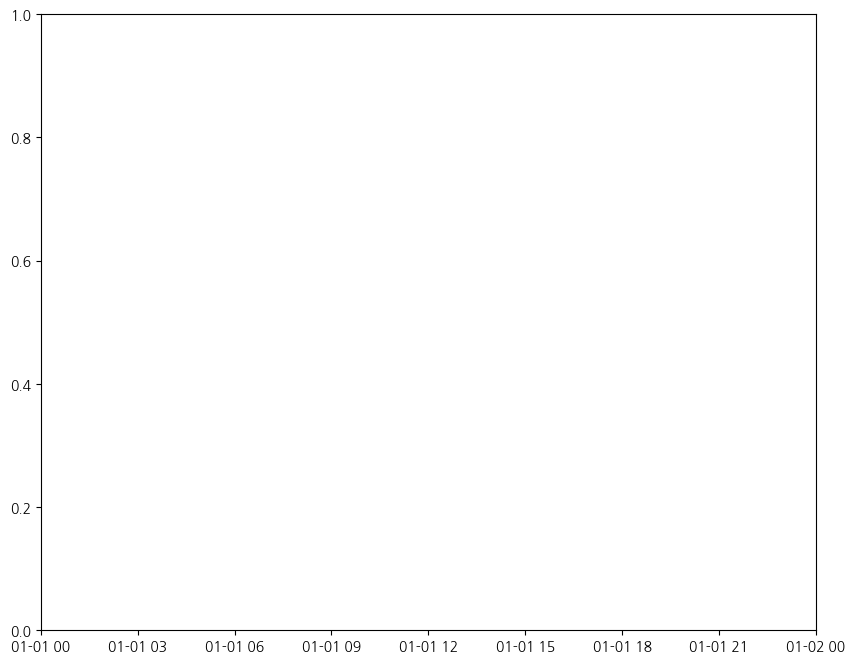

In [ ]:
# 코드를 작성하시오
plt.figure(figsize=(10, 8))
plt.plot(df_sale_seoul.index, df_sale_seoul['종로구'], label='매매가격지수')
plt.plot(df_rent_seoul.index, df_sale_seoul['강남구'], label='전세가격지수')
plt.legend()
plt.show()

In [ ]:
df_sale_seoul[df_sale_seoul['지역명']=='용산구']

### 강남구의 매매가격지수, 전세가격지수 상관관계 시각화

In [ ]:
# 코드를 작성하시오

# 강남구의 매매가격지수와 전세가격지수 데이터를 하나의 DataFrame으로 통합(concat)
df_gangnam = pd.concat([df_sale_seoul['강남구'],df_rent_seoul['강남구']], axis=1)
df_gangnam.columns = ['매매가격지수', '전세가격지수']
df_gangnam.head()

,매매가격지수,전세가격지수
2008-04-07 00:00:52,62.208806,47.627663
2008-04-14 00:00:52,62.272677,47.642639
2008-04-21 00:00:52,62.311381,47.679553
2008-04-28 00:00:52,62.373058,47.729333
2008-05-05 00:00:52,62.366691,47.707611


<Axes: xlabel='매매가격지수', ylabel='전세가격지수'>

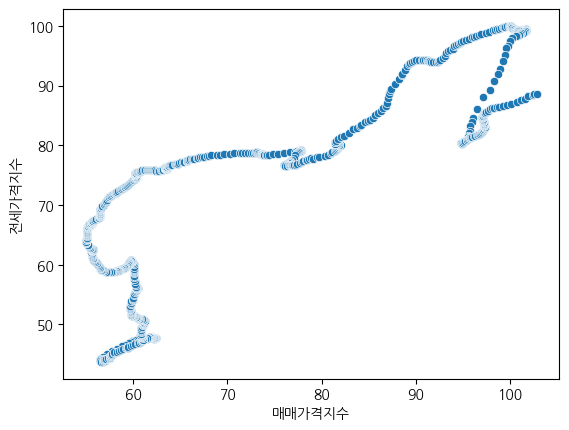

In [ ]:
# 두 데이터 간 상관관계를 시각화하기 위해 scatterplot 사용
sns.scatterplot(data=df_gangnam, x='매매가격지수', y='전세가격지수')

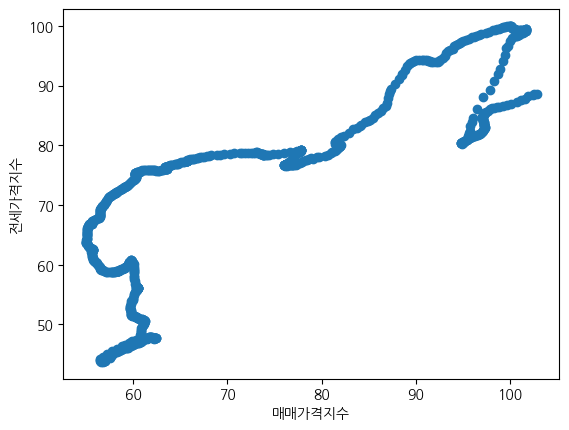

In [ ]:
# 코드를 작성하시오

plt.scatter(df_sale_seoul['강남구'], df_rent_seoul['강남구'])
plt.xlabel('매매가격지수')
plt.ylabel('전세가격지수')
plt.show()

### 매매가격지수와 전세가격지수의 차이가 가장 큰(or 적은) 지역을 판단하고, 해당 지역에 가격지수를 시각화

In [ ]:
# 코드를 작성하시오
df_both_seoul_long = df_sale_seoul_long.copy()
df_both_seoul_long['전세가격지수'] = df_rent_seoul_long['전세가격지수']
df_both_seoul_long['diff'] = df_both_seoul_long['매매가격지수'] - df_both_seoul_long['전세가격지수']
df_both_seoul_long['diff'] = abs(df_both_seoul_long['매매가격지수'] - df_both_seoul_long['전세가격지수']) # 절대값
df_both_seoul_long.head()

,지역명,매매가격지수,전세가격지수,diff
2008-04-07 00:00:52,종로구,68.904068,54.168566,14.735502
2008-04-14 00:00:52,종로구,69.003505,54.238522,14.764982
2008-04-21 00:00:52,종로구,69.014767,54.238522,14.776245
2008-04-28 00:00:52,종로구,69.06011,54.238522,14.821588
2008-05-05 00:00:52,종로구,69.06011,54.268338,14.791772


In [ ]:
# 차이(diff)가 가장 큰 값
df_both_seoul_long.sort_values(by='diff', ascending=False).head(1)

,지역명,매매가격지수,전세가격지수,diff
2008-08-04 00:00:52,강북구,66.161265,45.181123,20.980142


In [ ]:
# 차이(diff)가 가장 작은 값
df_both_seoul_long.sort_values(by='diff', ascending=True).head(1)

,지역명,매매가격지수,전세가격지수,diff
2016-05-16 00:00:52,강동구,62.282478,86.416271,-24.133793


<Axes: >

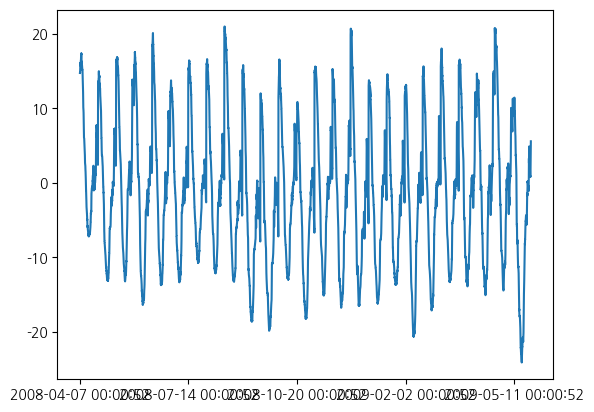

In [ ]:
# 아무 쓸모 없는 그래프 [경고!] < 모든 지역 데이터가 포함
df_both_seoul_long['diff'].plot()

### '강남구'의 매매가격지수변동률과 전세가격지수 변동률을 구하고, 시각화

In [98]:
# 코드를 작성하시오
df_both_seoul_long['매매가격지수변동률'] = df_both_seoul_long['매매가격지수'].pct_change().copy() #변동률 내장 함수
df_both_seoul_long['전세가격지수변동률'] = df_both_seoul_long['전세가격지수'].pct_change().copy()

<ipython-input-98-b5c2b4f7b2fd>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_both_seoul_long['매매가격지수변동률'] = df_both_seoul_long['매매가격지수'].pct_change().copy() #변동률 내장 함수
<ipython-input-98-b5c2b4f7b2fd>:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_both_seoul_long['전세가격지수변동률'] = df_both_seoul_long['전세가격지수'].pct_change().copy()


In [99]:
# Index(날짜)를 datetime 데이터타입으로 변경
df_both_seoul_long.index = pd.to_datetime(df_both_seoul_long.index)

In [100]:
# 결측치 제거
df_both_seoul_long.dropna(inplace=True)
df_both_seoul_long.head()

,지역명,매매가격지수,전세가격지수,diff,매매가격지수변동률,전세가격지수변동률
2008-04-21 00:00:52,종로구,69.014767,54.238522,14.776245,0.000163,0.000000
2008-04-28 00:00:52,종로구,69.06011,54.238522,14.821588,0.000657,0.000000
2008-05-05 00:00:52,종로구,69.06011,54.268338,14.791772,0.000000,0.000550
2008-05-12 00:00:52,종로구,69.019522,54.268338,14.751184,-0.000588,0.000000
2008-05-19 00:00:52,종로구,69.019522,54.273274,14.746248,0.000000,0.000091


In [117]:
yongsan_df = df_both_seoul_long[df_both_seoul_long['지역명']=='동대문구']

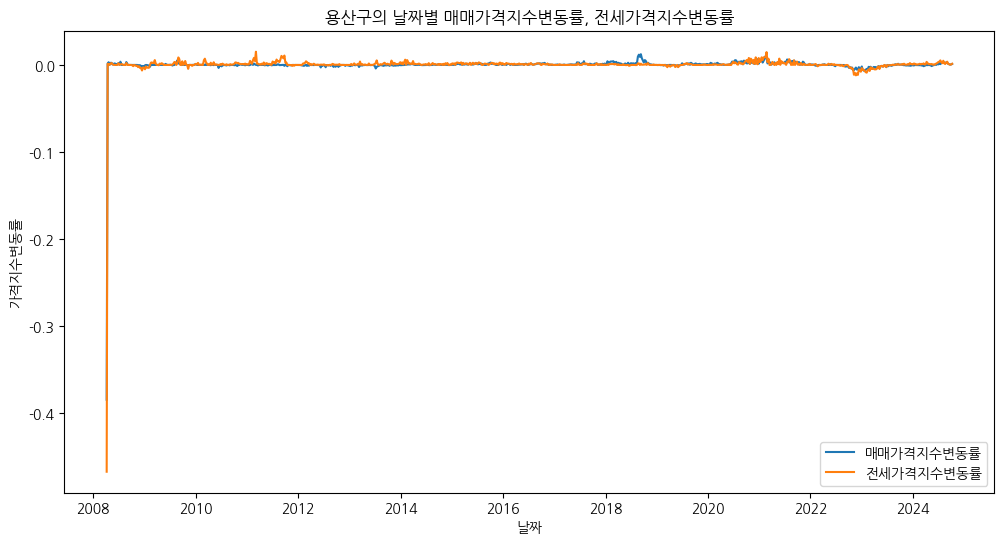

In [118]:
# figure size 설정
plt.figure(figsize=(12, 6))

# lineplot
plt.plot(yongsan_df['매매가격지수변동률'], label='매매가격지수변동률')
plt.plot(yongsan_df['전세가격지수변동률'], label='전세가격지수변동률')
plt.title('용산구의 날짜별 매매가격지수변동률, 전세가격지수변동률')
plt.xlabel('날짜')
plt.ylabel('가격지수변동률')
plt.legend()
plt.show()

In [131]:
# '종로구' 지역 한정 매매/전세가격지수변동률
temp_df = df_both_seoul_long[df_both_seoul_long['지역명'] == '종로구']

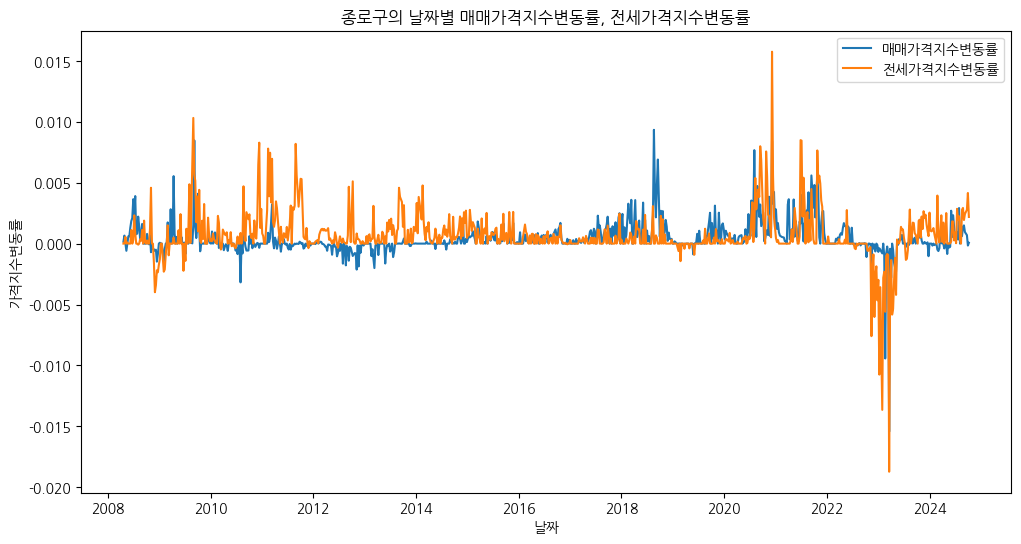

In [132]:
# figure size 설정
plt.figure(figsize=(12, 6))
# lineplot
plt.plot(temp_df['매매가격지수변동률'], label='매매가격지수변동률')
plt.plot(temp_df['전세가격지수변동률'], label='전세가격지수변동률')
plt.title('종로구의 날짜별 매매가격지수변동률, 전세가격지수변동률')
plt.xlabel('날짜')
plt.ylabel('가격지수변동률')
plt.legend()
plt.show()

<Axes: >

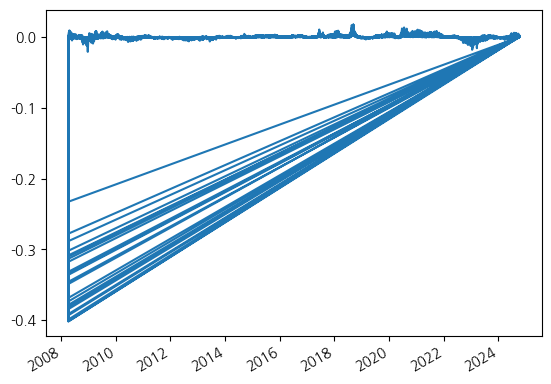

In [105]:
df_both_seoul_long['매매가격지수변동률'].plot()

### 서울 지역별 특정 시점(예. 24년 10월) 기준 전세가격지수 변동률을 히트맵으로 시각화

In [152]:
import folium
from folium.plugins import HeatMap, MousePosition

# 서울시 지역구별 위경도 및 인구수를 데이터프레임으로 생성
data = {
    'district': ['강남구', '강동구', '강서구', '관악구', '광진구', '구로구',
                 '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구',
                 '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구',
                 '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'],
    'latitude': [37.4979, 37.5307, 37.5502, 37.4783, 37.5407, 37.4950,
                 37.4574, 37.6529, 37.6692, 37.5743, 37.5125, 37.5547,
                 37.5772, 37.4845, 37.5636, 37.5894, 37.5155, 37.5110,
                 37.5260, 37.5326, 37.6063, 37.5700, 37.5636, 37.6016],
    'longitude': [127.0276, 127.1237, 126.8499, 126.9515, 127.0823, 126.8824,
                  126.8956, 127.0771, 127.0335, 127.0395, 126.9810, 126.9067,
                  126.9368, 127.0322, 127.0425, 127.0117, 127.1050, 126.8642,
                  126.9035, 126.9947, 126.9280, 126.9800, 126.9970, 127.0959],
}

# 데이터프레임 생성
seoul_GIS = pd.DataFrame(data)

In [107]:
seoul_GIS.head()

,district,latitude,longitude
0,강남구,37.4979,127.0276
1,강동구,37.5307,127.1237
2,강서구,37.5502,126.8499
3,관악구,37.4783,126.9515
4,광진구,37.5407,127.0823


In [108]:
df_both_seoul_long.head()

,지역명,매매가격지수,전세가격지수,diff,매매가격지수변동률,전세가격지수변동률
2008-04-21 00:00:52,종로구,69.014767,54.238522,14.776245,0.000163,0.000000
2008-04-28 00:00:52,종로구,69.06011,54.238522,14.821588,0.000657,0.000000
2008-05-05 00:00:52,종로구,69.06011,54.268338,14.791772,0.000000,0.000550
2008-05-12 00:00:52,종로구,69.019522,54.268338,14.751184,-0.000588,0.000000
2008-05-19 00:00:52,종로구,69.019522,54.273274,14.746248,0.000000,0.000091


In [109]:
df_both_seoul_long['연월'] = df_both_seoul_long.index.strftime('%Y-%m')
df_both_seoul_long.head()

,지역명,매매가격지수,전세가격지수,diff,매매가격지수변동률,전세가격지수변동률,연월
2008-04-21 00:00:52,종로구,69.014767,54.238522,14.776245,0.000163,0.000000,2008-04
2008-04-28 00:00:52,종로구,69.06011,54.238522,14.821588,0.000657,0.000000,2008-04
2008-05-05 00:00:52,종로구,69.06011,54.268338,14.791772,0.000000,0.000550,2008-05
2008-05-12 00:00:52,종로구,69.019522,54.268338,14.751184,-0.000588,0.000000,2008-05
2008-05-19 00:00:52,종로구,69.019522,54.273274,14.746248,0.000000,0.000091,2008-05


In [134]:
# 1) 연월 == 2024-10 필터링
# 2) 연월, 지역명 기준 그룹화
# 3) 전세가격지수변동률만 필터링
# 4) 평균값으로 집계(agg)
# 5) seoul_GIS와 그룹하기 위해 연월, 지역명 그룹 해제

rent_rate_oct= df_both_seoul_long[df_both_seoul_long['연월']== '2024-10'].groupby(['연월','지역명'])['전세가격지수변동률'].mean().reset_index()
rent_rate_oct

,연월,지역명,전세가격지수변동률
0,2024-10,강남구,0.001395
1,2024-10,강동구,0.000146
2,2024-10,강북구,0.000338
3,2024-10,강서구,0.002518
4,2024-10,관악구,0.002678
5,2024-10,광진구,0.001077
6,2024-10,구로구,0.000813
7,2024-10,금천구,0.000735
8,2024-10,노원구,0.000951
9,2024-10,도봉구,0.000454


In [138]:
# join에서 key로 사용하기 위한 칼럼명 통일
rent_rate_oct.rename(columns={'지역명':'district'},inplace=True)
rent_rate_oct.head(3)

,연월,district,전세가격지수변동률
0,2024-10,강남구,0.001395
1,2024-10,강동구,0.000146
2,2024-10,강북구,0.000338


In [139]:
seoul_GIS.head(3)

,district,latitude,longitude
0,강남구,37.4979,127.0276
1,강동구,37.5307,127.1237
2,강서구,37.5502,126.8499


In [141]:
# left join
df_map = pd.merge(rent_rate_oct, seoul_GIS, on='district', how='left')
df_map

,연월,district,전세가격지수변동률,latitude,longitude
0,2024-10,강남구,0.001395,37.4979,127.0276
1,2024-10,강동구,0.000146,37.5307,127.1237
2,2024-10,강북구,0.000338,NaN,NaN
3,2024-10,강서구,0.002518,37.5502,126.8499
4,2024-10,관악구,0.002678,37.4783,126.9515
5,2024-10,광진구,0.001077,37.5407,127.0823
6,2024-10,구로구,0.000813,37.4950,126.8824
7,2024-10,금천구,0.000735,37.4574,126.8956
8,2024-10,노원구,0.000951,37.6529,127.0771
9,2024-10,도봉구,0.000454,37.6692,127.0335


In [143]:
# 결측치 제거 : 강북구
df_map.dropna(inplace=True)

In [169]:
# 지도 위에 전세가격지수변동률 히트맵으로 시각화
# 위도, 경도, 가중치
heat_data = [[row['latitude'], row['longitude'], row['전세가격지수변동률']*1000] for index, row in df_map.iterrows()]

# 지도 생성 : 위치(location) 및 크기(zoom_start)
m = folium.Map(location=[37.5502, 126.982], zoom_start=10.5)

# 히트맵 추가
HeatMap(heat_data).add_to(m)

# 마우스 커서의 위도, 경도 정보를 표출 (MousePosition)
mouse_position = MousePosition()
mouse_position.add_to(m)

m

In [ ]:
#